In [5]:
from collections import defaultdict

import tqdm as tqdm
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import networkx as nx 

%matplotlib inline 

## Populartion based quantification of diversity.

We follow the diversity and entropy measures from the ecology and scientometrics literature and use standard measures
for entropy in our patent data-set where the patents are assigned different categories based on their scope (area). 

The image below is taken from the [paper](https://www.jstor.org/stable/40234813?typeAccessWorkflow=login)

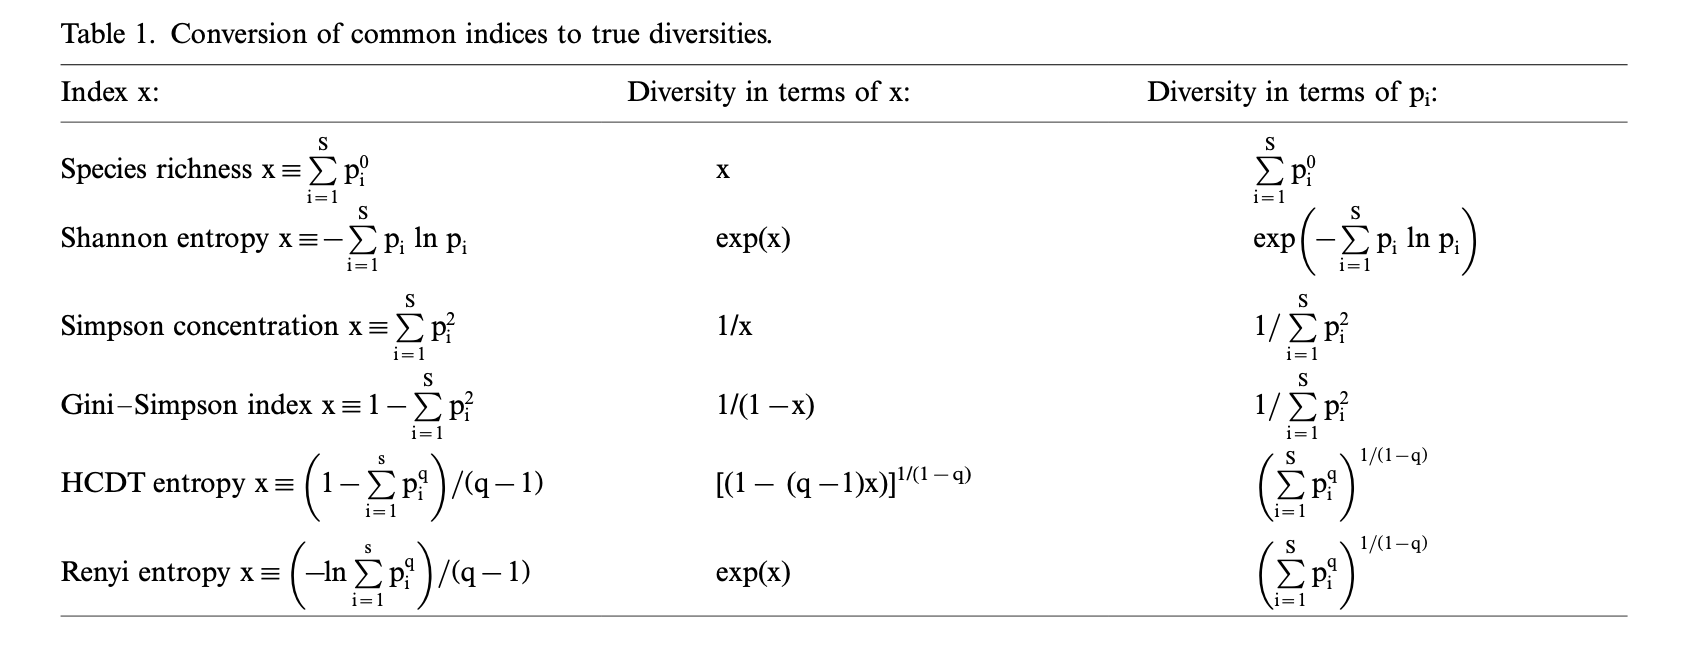


**Note - These measure are based on the abundance of the labels and do not incorporate the heirarchical strucutre of the classification**

In [19]:
class Diversity_Measures:
    
    def __init__(self,patents_to_ipcList,label_tree = None):
        
        '''
            takes the dictionary of patents ids (unique) : [list of labels they belong to] and calculates 
            different diversity measures. 
            
            if:  
                label_tree = None .. measures considering the tree information are not implemented. 
            
            else if: 
                label_tr = nx.Graph() with an heirarchical connection between patent ipc's the diversity measures 
                such as Weitzman Diversity etc. are calculated
        '''
        
        self.data = patents_to_ipcList
        
        self.unique_IPC = list(set([self.data[p] for p in self.data])) ## gets all the unique ipcs as a list
        
        self.ipc_probabilities = self.get_probability() # calculates the frequency of each ipc in the dataset
        
        self.N_total = len(self.unique_IPC) # totol number of unique ipc's or the number of species in ecology terms
        
        self.label_tree = label_tree
        
        pass
    
    
    def get_probability(self):
        
        ipc_count = defaultdict(int)

        for i in self.data:
            for j in self.data[i]:    
                ipc_count[j]+=1   ### counts the occurence of this label in the entire data set
                
        ipc_count = dict(ipc_count)
        total_occrrences = sum(ipc_count.values())
        p_ipc = {i:ipc_count[i]/total_occrrences for i in ipc_count}
        
        return p_ipc
    
    
    def get_diversity(msr:str,**kwargs):
        
        
        '''
            calculates the entropy based on the msr as follow:
            
            'shann': Shannon Entropy based diversity
            'simp'  : Simpsons concentration
            'hcdt'  : HCDT Diversity .. q is passed as a keyword
            
            in terms of pi the entropy values shown in the above are reduntant and hence we use the above 3 
            to distinguish. 
            
            follow the figure above for more details on the measures
        '''
        
        #### put assert test here -- incase someone enters the wrong format
        
        Div = {}
        
        if msr == 'shann':
            
            for pat in self.data:
                
                Div[pat] = -np.sum([self.ipc_probabilities[ipc]*np.log2(self.ipc_probabilities[ipc]) \
                                    for ipc in self.data[pat]])/np.log2(self.N_total)
        if msr == 'simp':
            
            for pat in self.data:
                
                Div[pat] = 1/(np.sum([self.ipc_probabilities[ipc]**2 for ipc in self.data[pat]]))
                
        if msr == 'hcdt':
            
            for pat in self.data:
                
                Div[pat] = (np.sum([self.ipc_probabilities[ipc]**q for ipc in self.data[pat]]))**(1/(1-q))
                
        return Div

#### Follow up with the everyone to discuss heirarchical measures.. implemented in the following papers -- 

[Modelling the multi-scalar effect of commuting on
exposure to diversity](https://arxiv.org/pdf/2306.00213.pdf)

[The scalar mismatch of regional governance: a comparative
analysis of hierarchical structures](https://arxiv.org/pdf/2302.04904.pdf)

[Uncovering structural diversity in commuting networks: global and local entropy
](https://www.nature.com/articles/s41598-022-05556-6)

#### To take into account the rarity of species - 

Most of the measures for entropy (diversity) are biased towards abundant species. In our case this translates to patents with popular ipcs'. However to have an unbiased measure for diversity.. we need to take into account the size effect. Some methods proposed to overcome these biases are : 

**Hypergeometric test**: The hypergeometric test is a statistical test used to determine whether the proportion of rare species in a sample is significantly different from a hypothesized value. It is particularly useful when the sample size is small and the number of rare species is low. The test calculates the probability of obtaining the observed number of rare species or fewer, given the total number of individuals in the sample and the estimated population frequency of the rare species. If the calculated probability is less than a certain significance level (e.g., 0.05), then the null hypothesis that the proportion of rare species is equal to the population frequency can be rejected, indicating that the rare species is overrepresented in the sample.

**Incidence function**: The incidence function is a mathematical function that describes the relationship between the number of individuals of a particular species and the number of samples in which that species is found. The incidence function can be used to estimate the abundance of rare species by fitting a statistical model to the data and estimating the parameters of the function.

**Rarefaction**: Rarefaction is a statistical technique used to estimate the number of rare species in a community from a sample of individuals. It assumes that the number of individuals of each species follows a Poisson distribution, and that the number of species encountered in a sample follows a negative binomial distribution. By fitting a statistical model to the data, rarefaction can estimate the number of rare species that would be encountered if a larger sample size was collected.

**Estimate-corrected ACE (ACE) protocol**: The ACE (Abundance-Corrected Estimate) protocol is a statistical method used to estimate the abundance of rare species in a community from a sample of individuals. It corrects for the fact that rare species may not be represented in the sample due to their low abundance. The estimate-corrected ACE protocol first estimates the abundance of each species in the sample using a statistical model, and then adjusts the estimates for the probability that each species was not detected in the sample due to its rarity.

**Bayesian estimation**: Bayesian estimation is a statistical method that uses Bayes' theorem to update our belief about the parameter of interest (e.g., the abundance of a rare species) given new data. It allows us to incorporate prior knowledge or beliefs about the parameter, as well as any relevant uncertainty or variability in the data. Markov chain Monte Carlo (MCMC) techniques can be used to generate a posterior distribution of the parameter, from which we can calculate the mean or median as an estimate of the abundance of the rare species.